# Librerias

In [1]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

from tabulate import tabulate

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

import pandas as pd

# Dataset 19 - Bike Sharing - Regresion Multivariable y Polinómica

Dadas las caracteristicas de este dataset se aplica regresion multivariable y polinomica.

## Procesamiento de datos

In [2]:
# Leer datos
df = pd.read_csv('/content/drive/MyDrive/SIS420/Primer Parcial/Datasets/hour.csv', delimiter=',')

In [3]:
# prompt: head df

print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [4]:
# Cuenta el número de filas y columnas
num_filas, num_columnas = df.shape

# Imprime el resultado
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 17379
Número de columnas: 17


In [5]:
# Obtiene los tipos de datos de cada columna
tipos_de_dato = df.dtypes

# Imprime los tipos de datos por columna
print(tipos_de_dato)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [6]:
# Seleccionar las columnas requeridas
selected_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Crear el DataFrame df_cleaned con las columnas seleccionadas
df_cleaned = df[selected_columns].copy()

In [7]:
print(df_cleaned.head())

   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  casual  registered  cnt  
0  0.2879  0.81        0.0       3          13   16  
1  0.2727  0.80        0.0       8          32   40  
2  0.2727  0.80        0.0       5          27   32  
3  0.2879  0.75        0.0       3          10   13  
4  0.2879  0.75        0.0       0           1    1  


## Regresión Multiple

In [8]:
# columnas relevantes para X
features = ['season', 'yr', 'mnth', 'hr', 'holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered' ]
X = df_cleaned[features].values

# Phising' para y
y = df_cleaned['cnt'].values

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(0.8 * len(df_cleaned))

X_train, y_train = X[:train_size], y[:train_size]

X_test, y_test = X[train_size:], y[train_size:]

# Asignar X_train y y_train a X y y respectivamente
X = X_train
y = y_train
m_train = len(y_train)

m = y.size

In [9]:
#grafico de costo
#entrenamiento
#validacion

In [10]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [11]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.000e+00 0.000e+00 1.000e+00 ... 0.000e+00 3.000e+00 1.300e+01]
 [1.000e+00 0.000e+00 1.000e+00 ... 0.000e+00 8.000e+00 3.200e+01]
 [1.000e+00 0.000e+00 1.000e+00 ... 0.000e+00 5.000e+00 2.700e+01]
 ...
 [3.000e+00 1.000e+00 8.000e+00 ... 1.343e-01 4.400e+01 2.830e+02]
 [3.000e+00 1.000e+00 8.000e+00 ... 1.343e-01 8.900e+01 1.610e+02]
 [3.000e+00 1.000e+00 8.000e+00 ... 8.960e-02 8.400e+01 1.300e+02]]
Media calculada: [2.26382795e+00 3.78191757e-01 5.65014745e+00 1.15465727e+01
 2.74041574e-02 2.99942458e+00 6.84456592e-01 1.41998130e+00
 4.99169963e-01 4.78017370e-01 6.22995756e-01 1.94096591e-01
 3.40379774e+01 1.40601165e+02]
Desviación estandar calculada: [1.03621676e+00 4.84935823e-01 3.21830695e+00 6.91198660e+00
 1.63257985e-01 2.00563823e+00 4.64731929e-01 6.44036554e-01
 1.97709029e-01 1.76607567e-01 1.98187197e-01 1.23018779e-01
 4.73394833e+01 1.37507422e+02]
[[-1.21965597 -0.77988002 -1.44490489 ... -1.57778018 -0.65564673
  -0.92795839]
 [-1.21965597 -0.77988002 -1.4449

In [12]:
def graficarDatos(x, y, xlabel, ylabel):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro')

    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)

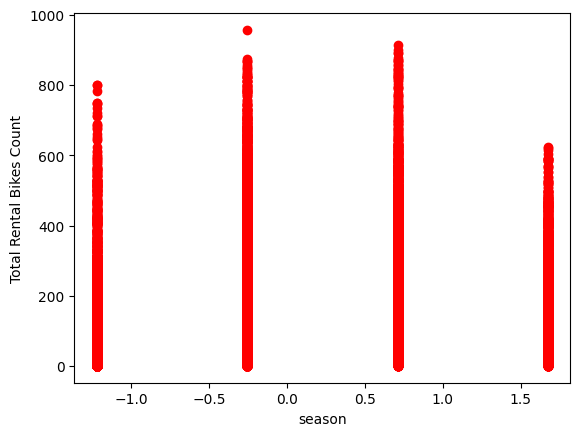

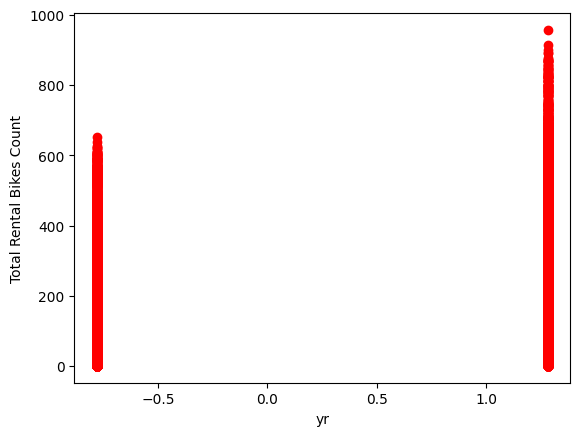

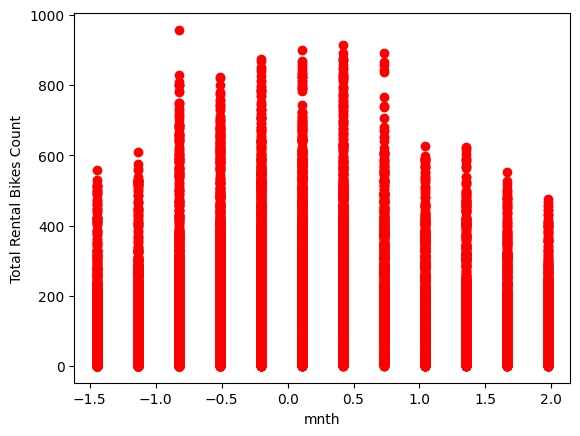

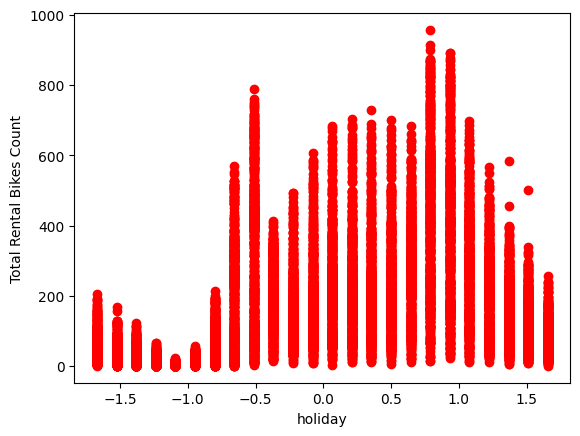

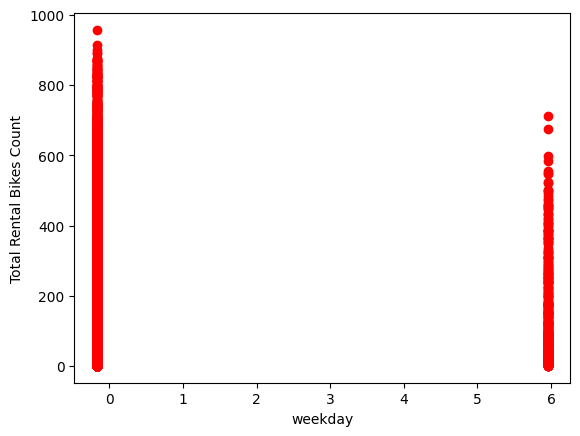

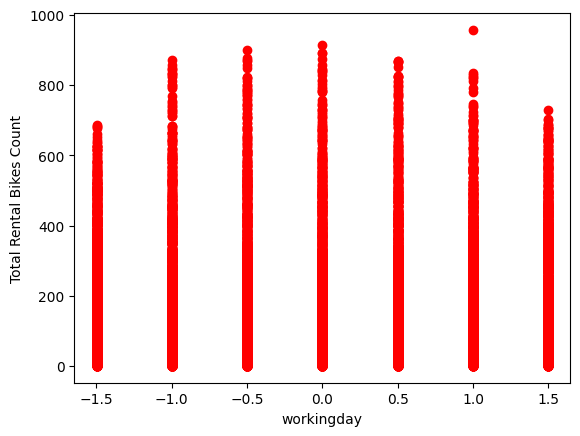

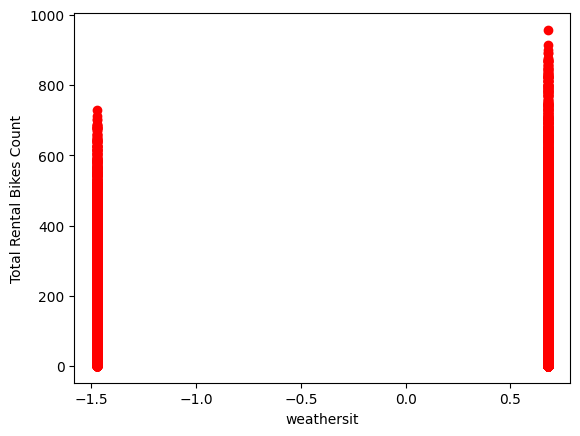

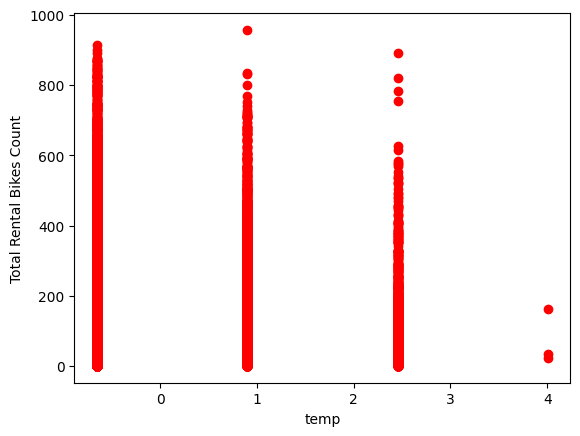

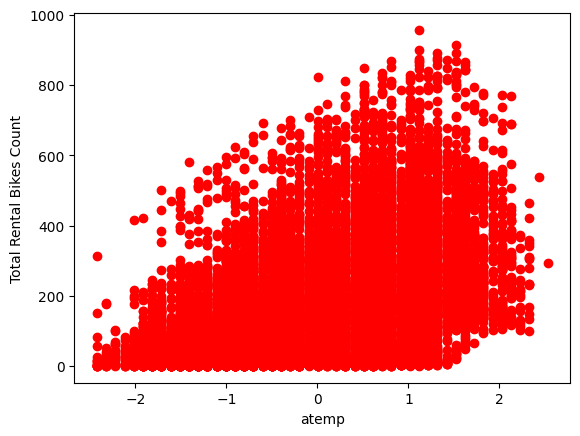

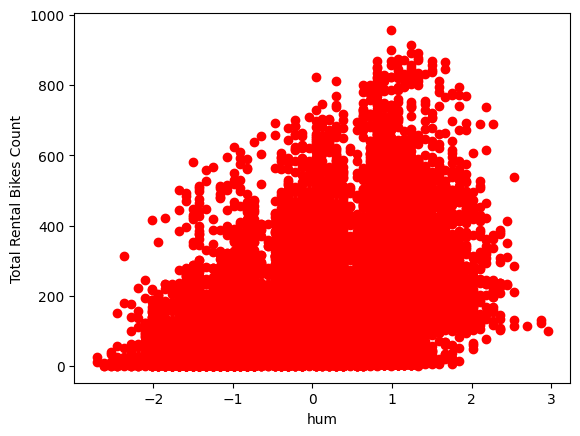

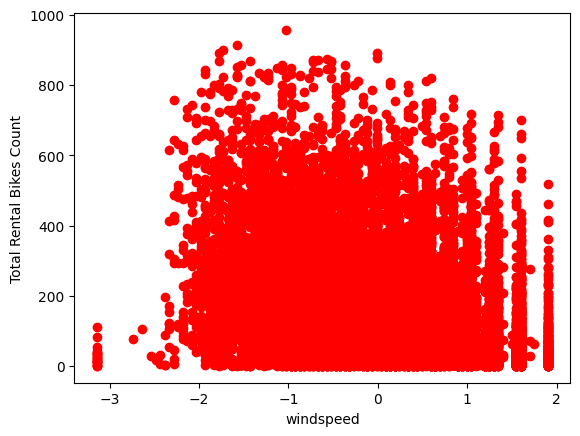

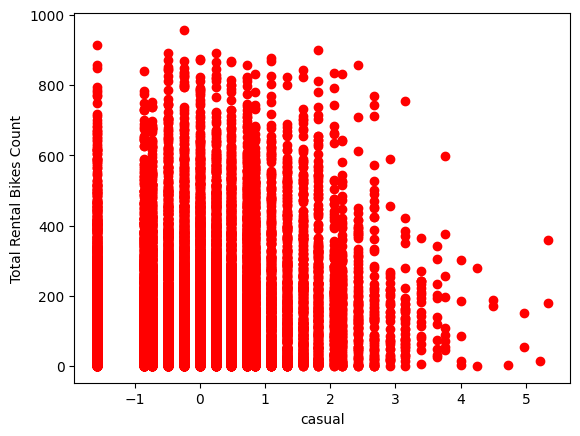

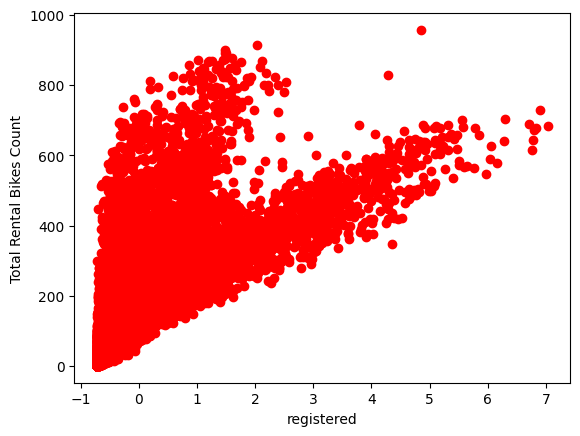

In [13]:
xlabel1 = 'season'
xlabel2 = 'yr'
xlabel3 = 'mnth'
xlabel4 = 'holiday'
xlabel5 = 'weekday'
xlabel6 = 'workingday'
xlabel7 = 'weathersit'
xlabel8 = 'temp'
xlabel9 = 'atemp'
xlabel10 = 'hum'
xlabel11 = 'windspeed'
xlabel12 = 'casual'
xlabel13 = 'registered'


ylabel1 = "Total Rental Bikes Count"

graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 2], y, xlabel3, ylabel1)
graficarDatos(X_norm[:, 3], y, xlabel4, ylabel1)
graficarDatos(X_norm[:, 4], y, xlabel5, ylabel1)
graficarDatos(X_norm[:, 5], y, xlabel6, ylabel1)
graficarDatos(X_norm[:, 6], y, xlabel7, ylabel1)
graficarDatos(X_norm[:, 7], y, xlabel8, ylabel1)
graficarDatos(X_norm[:, 8], y, xlabel9, ylabel1)
graficarDatos(X_norm[:, 9], y, xlabel10, ylabel1)
graficarDatos(X_norm[:, 10], y, xlabel11, ylabel1)
graficarDatos(X_norm[:, 11], y, xlabel12, ylabel1)
graficarDatos(X_norm[:, 12], y, xlabel13, ylabel1)



In [14]:
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [15]:
X_ready

array([[ 1.        , -1.21965597, -0.77988002, ..., -1.57778018,
        -0.65564673, -0.92795839],
       [ 1.        , -1.21965597, -0.77988002, ..., -1.57778018,
        -0.55002665, -0.78978403],
       [ 1.        , -1.21965597, -0.77988002, ..., -1.57778018,
        -0.6133987 , -0.8261457 ],
       ...,
       [ 1.        ,  0.71044214,  1.28224852, ..., -0.48607693,
         0.21043792,  1.03557199],
       [ 1.        ,  0.71044214,  1.28224852, ..., -0.48607693,
         1.16101864,  0.14834716],
       [ 1.        ,  0.71044214,  1.28224852, ..., -0.84943609,
         1.05539856, -0.07709522]])

In [16]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [17]:
theta=np.array([0.2, 3.0, 0.2,0.1, 3.0, 0.2,1.1, 2.0, 0.7,0.8, 5.8, 0.9,0.7, 2.0, 0.3])
JJ = calcularCosto(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1 2.  0.7 0.8 5.8 0.9 0.7 2.  0.3] se obtiene un costo de: 28225.589423579655


In [18]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

los valores de theta calculados son: [ 1.74639143e+02 -5.07550285e-04 -2.11070172e-05  6.93030049e-04
 -1.96499098e-04  4.73379973e-04  8.21572700e-05  3.47706997e-05
  4.15734454e-04 -7.66937147e-02  7.67948115e-02 -8.18107766e-04
  2.69069356e-03  4.73397357e+01  1.37507121e+02]
con un costo de: 4.062427781315496e-05 


Text(0, 0.5, 'Costo J')

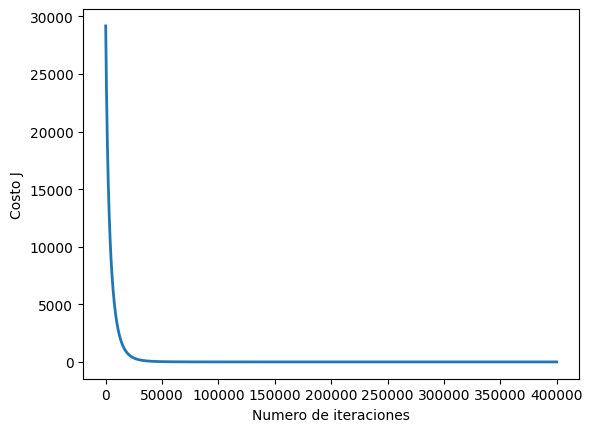

In [19]:
theta = np.zeros(15)

num_ite = 400000
alpha = 0.0001

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


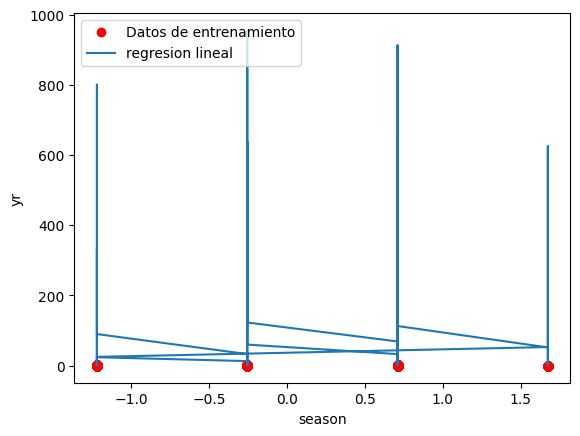

In [20]:
#grafica de la regresion lineal

# Graficar datos
graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

# Graficar regresión lineal
pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

# Ajustar leyenda del gráfico
pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [21]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [22]:
# Definir las características de la propiedad para la predicción
caracteristicas_prediccion = [1, 1, 1, 12, 19, 0, 1, 1, 2, 0.26, 0.2576, 0.60, 0.1642, 11, 108 ]  # Se agrega 1 al inicio para el término de sesgo

# Realizar la predicción
y_pred = np.dot(caracteristicas_prediccion, theta)

# Imprimir el precio predicho
print("Cantidad de bicicletas rentadas:", y_pred)



Cantidad de bicicletas rentadas: 15546.150101832529


In [23]:
# Creamos la matriz con 11 ejemplos para hacer la prueba de predicción de cantidad de bicicletas alquiladas en función de características similares a las que hemos estado utilizando
matriz_datos_prediccion = np.array([
    [1, 1, 1, 12, 19, 0, 1, 1, 2, 0.26, 0.2576, 0.60, 0.1642, 11, 108 ],
    [1, 1, 1, 12, 20, 0, 1, 1, 2, 0.26, 0.2576, 0.60, 0.1642, 8, 81],
    [1, 2, 1, 15, 25, 0, 1, 1, 2, 0.30, 0.2976, 0.65, 0.1742, 10, 110],
    [1, 1, 2, 20, 20, 1, 0, 1, 4, 0.18, 0.1876, 0.70, 0.1842, 9, 109],
    [1, 2, 1, 5, 30, 0, 1, 0, 3, 0.25, 0.2476, 0.58, 0.1542, 14, 106],

    [1, 1, 1.5, 18, 22, 0, 0, 1, 2, 0.28, 0.2776, 0.62, 0.1642, 13, 111],
    [1, 3, 1, 8, 28, 1, 0, 0, 4, 0.20, 0.2076, 0.72, 0.1942, 8, 112],
    [1, 2, 2, 25, 15, 0, 1, 1, 3, 0.32, 0.3276, 0.67, 0.1842, 10, 113],
    [1, 1, 1.5, 12, 18, 0, 0, 0, 2, 0.24, 0.2376, 0.59, 0.1542, 11, 114],
    [1, 2, 1, 7, 20, 1, 0, 1, 3, 0.26, 0.2576, 0.63, 0.1742, 9, 115],
    [1, 3, 2, 17, 22, 0, 1, 0, 4, 0.19, 0.1976, 0.71, 0.1842, 8, 116]
])

# Creamos un vector para almacenar cada predicción de y
y_prediccion = []

# Copiamos la matriz de datos de predicción para evitar la normalización de los datos originales
matriz_datos_copy = matriz_datos_prediccion.copy()

# Normalizamos todos los datos de la matriz de predicción, excepto el primer valor de cada ejemplo (el término de sesgo)
for datos in matriz_datos_prediccion:
    datos[1:] = (datos[1:] - mu) / sigma

# Calculamos la predicción de y para los 11 ejemplos de predicción
for datos in matriz_datos_prediccion:
    y_prediccion.append(np.dot(datos, theta))

# Agregamos la columna de predicciones de y a la matriz de datos copiada
matriz_datos_copy = np.column_stack((matriz_datos_copy, y_prediccion))

# Nombres de las columnas
nombres_columnas = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Convertir la matriz en una lista de listas para imprimir la tabla
datos_para_tabla = matriz_datos_copy.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))


+----+----------+------+--------+------+-----------+-----------+--------------+--------------+--------+---------+-------+-------------+----------+--------------+----------+
|    |   season |   yr |   mnth |   hr |   holiday |   weekday |   workingday |   weathersit |   temp |   atemp |   hum |   windspeed |   casual |   registered |      cnt |
+====+==========+======+========+======+===========+===========+==============+==============+========+=========+=======+=============+==========+==============+==========+
|  1 |        1 |  1   |     12 |   19 |         0 |         1 |            1 |            2 |   0.26 |  0.2576 |  0.6  |      0.1642 |       11 |          108 | 118.998  |
+----+----------+------+--------+------+-----------+-----------+--------------+--------------+--------+---------+-------+-------------+----------+--------------+----------+
|  1 |        1 |  1   |     12 |   20 |         0 |         1 |            1 |            2 |   0.26 |  0.2576 |  0.6  |      0.1642 |

In [24]:
# (Mean Squared Error, MSE)
def mean_squared_error(y_pred, y_actual):
    # Calculamos la diferencia entre las predicciones y los valores reales
    resta = y_pred - y_actual
    # Calculamos el error cuadrático
    err_cuadrado = np.sum(resta ** 2)
    # Dividimos entre el número de muestras para obtener el MSE
    mse = err_cuadrado / len(y_pred)
    return mse


In [25]:
# Calculamos el número de muestras en el conjunto de prueba
m_ready_test = len(y_test)

# Concatenamos una columna de unos al principio de X_test
X_ready_test = np.concatenate([np.ones((m_ready_test, 1)), X_test], axis=1)

# Normalizamos todos los datos de X_test, excepto el primer valor de cada ejemplo
for datos_test in X_ready_test:
    datos_test[1:] = (datos_test[1:] - mu) / sigma

# Creamos un array que almacenará cada una de las y predichas
y_predicha = []
for datos_test_ready in X_ready_test:
    y_predicha.append(np.dot(datos_test_ready, theta))

# Calculamos el error cuadrático medio (MSE)
mse = mean_squared_error(y_predicha, y_test)

# Imprimimos el MSE y la raíz cuadrada del MSE (RMSE)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))


Error Cuadrático Medio (MSE) = 0.0003180930841461527
Raíz del Error Cuadrático Medio (RMSE) = 0.017835164259017988


## Regresión polinómica

In [26]:

from sklearn.preprocessing import PolynomialFeatures

In [27]:
# columnas relevantes para X
features = ['season', 'yr', 'mnth', 'hr', 'holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered' ]
X_poli = df_cleaned[features].values

# Phising' para y
y_poli = df_cleaned['cnt'].values

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size_poli = int(0.8 * len(df_cleaned))

X_train_poli, y_train_poli = X[:train_size_poli], y[:train_size_poli]

X_poli_test, y_poli_test = X[train_size_poli:], y[train_size_poli:]

#preparar la transformación polinomial que se aplicará antes de entrenar el modelo de regresión polinómica
poly = PolynomialFeatures(degree=2)

# Asignar X_train y y_train a X y y respectivamente
X_poli = poly.fit_transform(X_train_poli)
y_poli = y_train_poli
m_poli = len(y_poli)


print(len(X_poli[1]))


120


In [28]:
def  featureNormalize(X_poli):
    X_norm_poli = X_poli.copy()
    mu_poli = np.zeros(X_poli.shape[1])
    sigma_poli = np.zeros(X_poli.shape[1])

    mu_poli = np.mean(X_poli, axis = 0)
    sigma_poli = np.std(X_poli, axis = 0)
    X_norm_poli = (X_poli - mu_poli) / sigma_poli

    return X_norm_poli, mu_poli, sigma_poli

In [32]:
#Usando la funcion de featureNormalice, pero solo los que estan en la primera columan ya que la primera columna es de unos
X_norm_poli, mu_poli, sigma_poli = featureNormalize(X_poli)
X_poli_ready = np.concatenate([np.ones((m_poli, 1)), X_norm_poli], axis=1)

# Normalizamos las características polinomiales
X_norm_poli, mu_poli, sigma_poli = featureNormalize(X_poli)

# Reemplazamos la columna de unos en la posición 0
X_norm_poli[:, 0] = 1

# Imprimimos algunos datos normalizados y con unos añadidos
print('Algunos datos normalizados y con unos añadidos:')
print(X_norm_poli[:10, :])  # Imprimimos solo los primeros 10 ejemplos

print('Media calculada:', mu_poli)
print('Desviación estándar calculada:', sigma_poli)

Algunos datos normalizados y con unos añadidos:
[[ 1.         -1.21965597 -0.77988002 ... -0.34684938 -0.53084022
  -0.51980111]
 [ 1.         -1.21965597 -0.77988002 ... -0.34122305 -0.51663328
  -0.50825987]
 [ 1.         -1.21965597 -0.77988002 ... -0.34521263 -0.52455512
  -0.51224194]
 ...
 [ 1.         -1.21965597 -0.77988002 ... -0.34766776 -0.5332626
  -0.52202837]
 [ 1.         -1.21965597 -0.77988002 ... -0.34766776 -0.53293525
  -0.52142094]
 [ 1.         -1.21965597 -0.77988002 ... -0.34122305 -0.53025099
  -0.52159642]]
Media calculada: [1.00000000e+00 2.26382795e+00 3.78191757e-01 5.65014745e+00
 1.15465727e+01 2.74041574e-02 2.99942458e+00 6.84456592e-01
 1.41998130e+00 4.99169963e-01 4.78017370e-01 6.22995756e-01
 1.94096591e-01 3.40379774e+01 1.40601165e+02 6.19866216e+00
 7.00855930e-01 1.56648925e+01 2.60828598e+01 6.02028339e-02
 6.78594548e+00 1.55491621e+00 3.20139538e+00 1.21739625e+00
 1.16063906e+00 1.44558297e+00 4.21307703e-01 8.30293462e+01
 3.33434151e+02 3

<ipython-input-28-aa87bb8e6795>:8: RuntimeWarning: invalid value encountered in divide
  X_norm_poli = (X_poli - mu_poli) / sigma_poli


In [38]:
def calcularCosto2(X_poli_ready, y_poli, theta_poli):
  m = y_poli.size
  J = 0
  h = np.dot(X_poli, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X_poli, theta) - y_poli))
  return J

# Dataset 95 - Forest Cover Type Dataset - Clasificación Multiclase y OnevsAll

## Procesamiento de datos

In [53]:
# Leer datos
df2 = pd.read_csv('/content/drive/MyDrive/SIS420/Primer Parcial/Datasets/covtype.csv', delimiter=',')

In [54]:
print(df2.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [55]:
# Seleccionar las columnas requeridas
selected_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type']

# Crear el DataFrame df_cleaned con las columnas seleccionadas
df2_cleaned = df2[selected_columns].copy()

## Clasificación multiclase


In [57]:
# La entrada es de 7 elemento contando con x0
input_layer_size  = 10

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 7

# columnas relevantes para X
features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
X2 = df2_cleaned[features].values

# Phising' para y
y2 = df2_cleaned['Cover_Type'].values

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size2 = int(0.8 * len(df2_cleaned))
X_train2, y_train2 = X2[:train_size2], y2[:train_size]
X_test2, y_test2 = X2[train_size:], y2[train_size:]

# Asignar X_train y y_train a X y y respectivamente
X2 = X_train2
y2 = y_train2
m_train2 = len(y_train2)

# Imprimir los datos de entrenamiento y prueba
print("Datos de entrenamiento:")
print(X_train2)
print(y_train2)
print("Datos de prueba:")
print(X_test2)
print(y_test2)


m2 = y.size

Datos de entrenamiento:
[[2596   51    3 ...  232  148 6279]
 [2590   56    2 ...  235  151 6225]
 [2804  139    9 ...  238  135 6121]
 ...
 [2968  306   14 ...  231  191  828]
 [2973  331   10 ...  228  170  849]
 [2974  328    9 ...  230  171  870]]
[5 5 2 ... 1 7 5]
Datos de prueba:
[[2748   13    9 ...  221  146 1511]
 [2695   37   10 ...  219  133 2014]
 [2536  318    7 ...  234  172 1082]
 ...
 [2386  159   17 ...  241  130  854]
 [2384  170   15 ...  245  143  864]
 [2383  165   13 ...  244  141  875]]
[2 6 3 ... 3 3 3]


In [58]:
# Imprimir la primera fila de características X y el vector de etiquetas y
print("Primera fila de características X:")
print(X2[0, :])
print("Vector de etiquetas y:")
print(y2)


Primera fila de características X:
[2596   51    3  258    0  510  221  232  148 6279]
Vector de etiquetas y:
[5 5 2 ... 1 7 5]


In [59]:
def  featureNormalize(X2):
    X_norm2 = X2.copy()
    mu2 = np.zeros(X2.shape[1])
    sigma2 = np.zeros(X2.shape[1])

    mu2 = np.mean(X2, axis = 0)
    sigma2 = np.std(X2, axis = 0)
    X_norm2 = (X2 - mu2) / sigma2

    return X_norm2, mu2, sigma2

In [60]:
# llama featureNormalize con los datos cargados
X_norm2, mu2, sigma2 = featureNormalize(X2)

In [64]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X2.shape

X2 = X_norm2

In [65]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [57]:
def lrCostFunction(theta, X2, y2, lambda_):

    # Inicializa algunos valores utiles
    m = y2.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y2.dtype == bool:
        y2 = y2.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X2.dot(theta.T))

    temp = theta
    temp[0] = 0

#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J = (1 / m) * np.sum(-y2.dot(np.log(h)) - (1 - y2).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y2).dot(X2)
#     theta = theta - (alpha / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

## Clasificación OnevsAll

In [68]:
def oneVsAll(X2, y2, num_labels, lambda_):

    # algunas variables utiles
    m, n = X2.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X2 = np.concatenate([np.ones((m, 1)), X2], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X2, (y2 == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [70]:
lambda_ = 0.1
all_theta = oneVsAll(X2, y2, num_labels, lambda_)
print(all_theta.shape)

NameError: name 'X2' is not defined